# Image Classification, Segmentation (ImageNet Pre-trained Model)

In [5]:
!pip install torchsummary

In [4]:
# 1.1. Install required libraries

# Core PyTorch libraries for building and training neural networks
import torch
import torch.nn as nn

# TorchVision for computer vision tasks, including models and data transformations
import torchvision.models as models
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

# Data manipulation and visualization libraries
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Utility for summarizing PyTorch models
from torchsummary import summary

print("All required libraries are successfully imported.")

All required libraries are successfully imported.


In [3]:
# 1.2. Show available pre-trained models in torchvision

models.list_models()

['alexnet',
 'convnext_base',
 'convnext_large',
 'convnext_small',
 'convnext_tiny',
 'deeplabv3_mobilenet_v3_large',
 'deeplabv3_resnet101',
 'deeplabv3_resnet50',
 'densenet121',
 'densenet161',
 'densenet169',
 'densenet201',
 'efficientnet_b0',
 'efficientnet_b1',
 'efficientnet_b2',
 'efficientnet_b3',
 'efficientnet_b4',
 'efficientnet_b5',
 'efficientnet_b6',
 'efficientnet_b7',
 'efficientnet_v2_l',
 'efficientnet_v2_m',
 'efficientnet_v2_s',
 'fasterrcnn_mobilenet_v3_large_320_fpn',
 'fasterrcnn_mobilenet_v3_large_fpn',
 'fasterrcnn_resnet50_fpn',
 'fasterrcnn_resnet50_fpn_v2',
 'fcn_resnet101',
 'fcn_resnet50',
 'fcos_resnet50_fpn',
 'googlenet',
 'inception_v3',
 'keypointrcnn_resnet50_fpn',
 'lraspp_mobilenet_v3_large',
 'maskrcnn_resnet50_fpn',
 'maskrcnn_resnet50_fpn_v2',
 'maxvit_t',
 'mc3_18',
 'mnasnet0_5',
 'mnasnet0_75',
 'mnasnet1_0',
 'mnasnet1_3',
 'mobilenet_v2',
 'mobilenet_v3_large',
 'mobilenet_v3_small',
 'mvit_v1_b',
 'mvit_v2_s',
 'quantized_googlenet',
 '

In [6]:
# 1.3. Display model categories and their available pre-trained models

classification_models = models.list_models(module=models)
segmentation_models = models.list_models(module=models.segmentation)
detection_models = models.list_models(module=models.detection)
video_models = models.list_models(module=models.video)

# Print the lists
display("Classification models:", classification_models)
display("Segmentation models:", segmentation_models)
display("Detection models:", detection_models)
display("Video models:", video_models)

'Classification models:'

['alexnet',
 'convnext_base',
 'convnext_large',
 'convnext_small',
 'convnext_tiny',
 'densenet121',
 'densenet161',
 'densenet169',
 'densenet201',
 'efficientnet_b0',
 'efficientnet_b1',
 'efficientnet_b2',
 'efficientnet_b3',
 'efficientnet_b4',
 'efficientnet_b5',
 'efficientnet_b6',
 'efficientnet_b7',
 'efficientnet_v2_l',
 'efficientnet_v2_m',
 'efficientnet_v2_s',
 'googlenet',
 'inception_v3',
 'maxvit_t',
 'mnasnet0_5',
 'mnasnet0_75',
 'mnasnet1_0',
 'mnasnet1_3',
 'mobilenet_v2',
 'mobilenet_v3_large',
 'mobilenet_v3_small',
 'regnet_x_16gf',
 'regnet_x_1_6gf',
 'regnet_x_32gf',
 'regnet_x_3_2gf',
 'regnet_x_400mf',
 'regnet_x_800mf',
 'regnet_x_8gf',
 'regnet_y_128gf',
 'regnet_y_16gf',
 'regnet_y_1_6gf',
 'regnet_y_32gf',
 'regnet_y_3_2gf',
 'regnet_y_400mf',
 'regnet_y_800mf',
 'regnet_y_8gf',
 'resnet101',
 'resnet152',
 'resnet18',
 'resnet34',
 'resnet50',
 'resnext101_32x8d',
 'resnext101_64x4d',
 'resnext50_32x4d',
 'shufflenet_v2_x0_5',
 'shufflenet_v2_x1_0',
 'sh

'Segmentation models:'

['deeplabv3_mobilenet_v3_large',
 'deeplabv3_resnet101',
 'deeplabv3_resnet50',
 'fcn_resnet101',
 'fcn_resnet50',
 'lraspp_mobilenet_v3_large']

'Detection models:'

['fasterrcnn_mobilenet_v3_large_320_fpn',
 'fasterrcnn_mobilenet_v3_large_fpn',
 'fasterrcnn_resnet50_fpn',
 'fasterrcnn_resnet50_fpn_v2',
 'fcos_resnet50_fpn',
 'keypointrcnn_resnet50_fpn',
 'maskrcnn_resnet50_fpn',
 'maskrcnn_resnet50_fpn_v2',
 'retinanet_resnet50_fpn',
 'retinanet_resnet50_fpn_v2',
 'ssd300_vgg16',
 'ssdlite320_mobilenet_v3_large']

'Video models:'

['mc3_18',
 'mvit_v1_b',
 'mvit_v2_s',
 'r2plus1d_18',
 'r3d_18',
 's3d',
 'swin3d_b',
 'swin3d_s',
 'swin3d_t']

In [7]:
# 2.1. Load and summarize pre-trained models from different modalities

"""
- For Classification models, just write models.<model_name>(pretrained=True) but
  for other modalities, you need to specify the module as well, e.g., models.segmentation.<model_name>(pretrained=True)

- 'pretrained=True' downloads the model with pre-trained weights.

- Move the model to GPU if available using .to(device)

- Set the model to evaluation mode using .eval() to disable dropout and batch normalization layers during inference.
    i.e. While training, dropout randomly sets some activations to zero to prevent overfitting.
    During evaluation, dropout is disabled to use the full network capacity.

    Similarly, batch normalization layers use running statistics during evaluation instead of batch statistics.
"""

# Device setup
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load models from different modalities
classification_model = models.resnet50(pretrained=True).to(device).eval()
segmentation_model = models.segmentation.fcn_resnet50(pretrained=True).to(device).eval()
detection_model = models.detection.fasterrcnn_resnet50_fpn(pretrained=True).to(device).eval()
video_model = models.video.r3d_18(pretrained=True).to(device).eval()

print("Models loaded successfully!")

/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


100%|██████████| 97.8M/97.8M [00:00<00:00, 200MB/s]
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FCN_ResNet50_Weights.COCO_WITH_VOC_LABELS_V1`. You can also use `weights=FCN_ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/fcn_resnet50_coco-1167a1af.pth" to /root/.cache/torch/hub/checkpoints/fcn_resnet50_coco-1167a1af.pth


100%|██████████| 135M/135M [00:00<00:00, 184MB/s]
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth


100%|██████████| 160M/160M [00:04<00:00, 38.3MB/s]
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=R3D_18_Weights.KINETICS400_V1`. You can also use `weights=R3D_18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/r3d_18-b3b3357e.pth" to /root/.cache/torch/hub/checkpoints/r3d_18-b3b3357e.pth


100%|██████████| 127M/127M [00:00<00:00, 141MB/s]


Models loaded successfully!


In [8]:
# 2.2 Summary of a pre-trained model in a detailed manner

# Load the ResNet50 model
classification_model = models.resnet50(pretrained=True)

# Basic model summary
print(classification_model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [10]:
# 2.3 Summary of a pre-trained model using torchsummary (Sumurizes the model architecture in a tabular format)

# file: resnet50_summary.py
import torch
import torchvision.models as models
from torchsummary import summary

# Load the ResNet50 model
classification_model = models.resnet50(pretrained=True)

# Move model to CPU
classification_model.to("cpu")

# Model summary using torchsummary
print("ResNet50 Model Summary with torchsummary:")
S = summary(classification_model, input_size=(3, 224, 224), device="cpu")


ResNet50 Model Summary with torchsummary:
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]           4,096
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]          16,384
      BatchNorm2d-12          [-1, 256, 56, 56]             512
           Conv2d-13          [-1, 256, 56, 56]          16,3

In [11]:
# 2.4 Manual Parameter Calculation

parameters = 0
for p in classification_model.parameters():
    parameters += p.numel()
print(f"Number of parameters: {parameters}")

Number of parameters: 25557032


To verify your results with the ImageNet Class: https://deeplearning.cms.waikato.ac.nz/user-guide/class-maps/IMAGENET/

In [19]:
# 3.1 Inference using a pre-trained model (Image Classification)

import torch
from torchvision import models, transforms
from PIL import Image

"""
TODO: Try different Images and see whether it classifies correctly or not.
      You can also try different pre-trained models (1 - Try with any EfficientNet Varient and see the output)).
"""

path = "/content/cat.jpg"
path2 = "/content/deer.jpg"

# Load the pretrained ResNet50 model
model = models.resnet50(pretrained=True).eval()      # Change it to efficentNet (any variant)

# Preprocess the image
img = Image.open(path).convert('RGB')
img2 = Image.open(path2).convert('RGB')

transform = transforms.Compose([
    transforms.Resize(256),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
img_tensor = transform(img).unsqueeze(0)  # Add batch dimension
img_tensor2 = transform(img2).unsqueeze(0)

# Perform inference
output = model(img_tensor)
output2 = model(img_tensor2)
_, predicted_class = output.max(1)
_, predicted_class2 = output2.max(1)

print(f"Predicted class ID: {predicted_class.item()}")
print(f"Predicted class ID: {predicted_class2.item()}")

/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Predicted class ID: 282
Predicted class ID: 352


In [30]:
# 3.2 Mapping Class ID to Class Name

import torch
from torchvision import models, transforms
from PIL import Image
import urllib.request

# Image paths
path1 = "/content/cat.jpg"
path2 = "/content/deer.jpg"

# Load pretrained EfficientNet variant (b0 here)
model = models.efficientnet_b0(pretrained=True).eval()

# Download ImageNet class index
url = "https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt"
with urllib.request.urlopen(url) as f:
    class_idx = [line.strip() for line in f.readlines()]

# Image preprocessing
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),  # EfficientNet expects 224x224
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    ),
])

def predict(image_path: str):
    img = Image.open(image_path).convert('RGB')
    tensor = transform(img).unsqueeze(0)  # batch
    with torch.no_grad():
        output = model(tensor)
    _, pred_id = output.max(1)
    pred_id = pred_id.item()
    label = class_idx[pred_id]
    return pred_id, label

id1, label1 = predict(path1)
id2, label2 = predict(path2)

print(f"{path1} -> ID: {id1}, Label: {label1}")
print(f"{path2} -> ID: {id2}, Label: {label2}")

/content/cat.jpg -> ID: 282, Label: b'tiger cat'
/content/deer.jpg -> ID: 352, Label: b'impala'


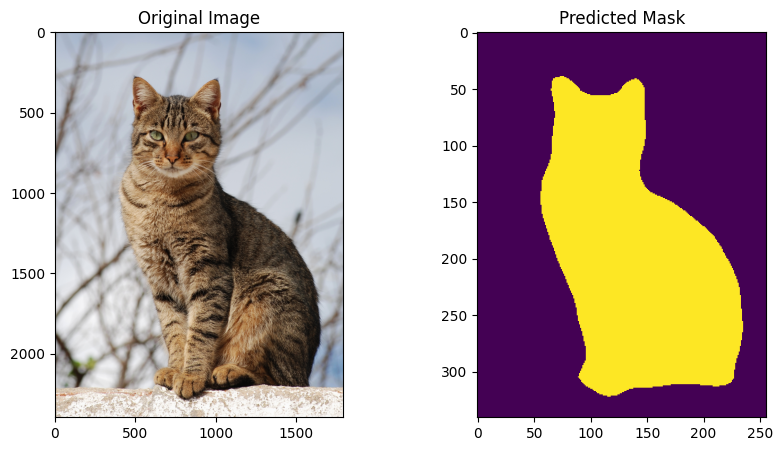

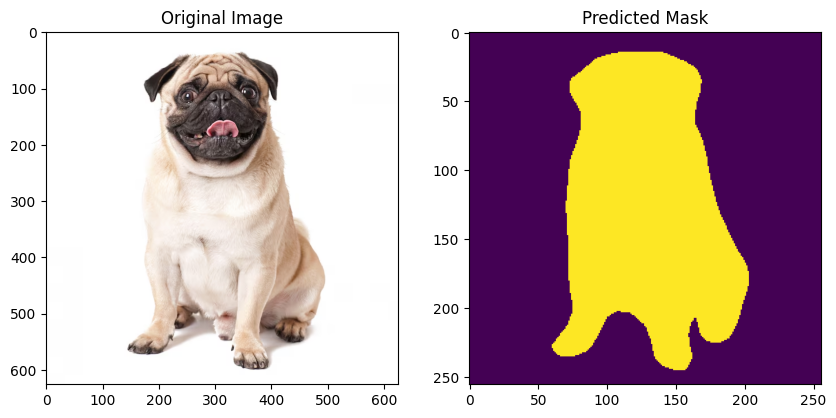

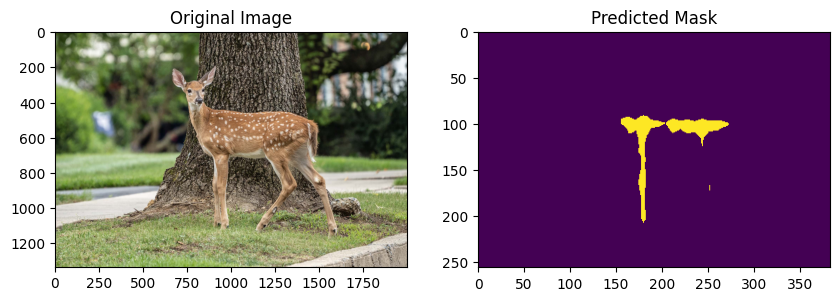

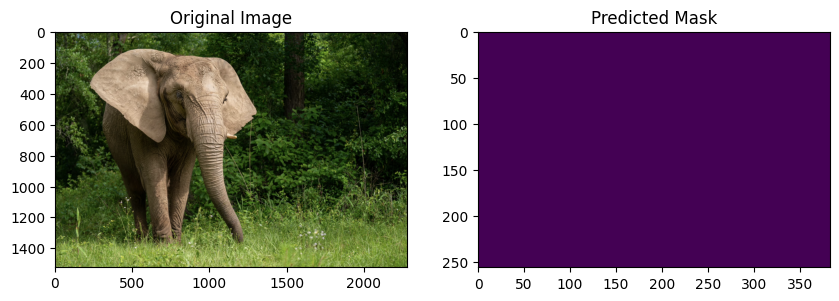

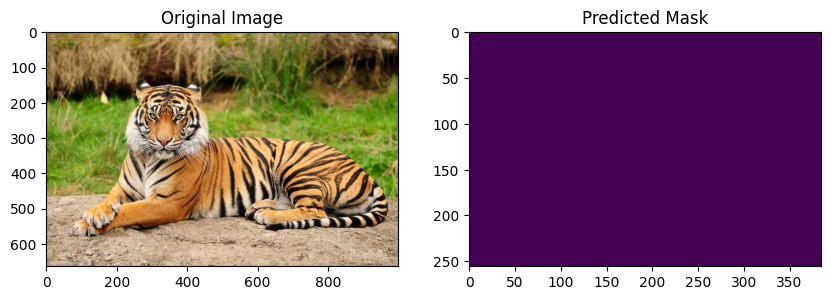

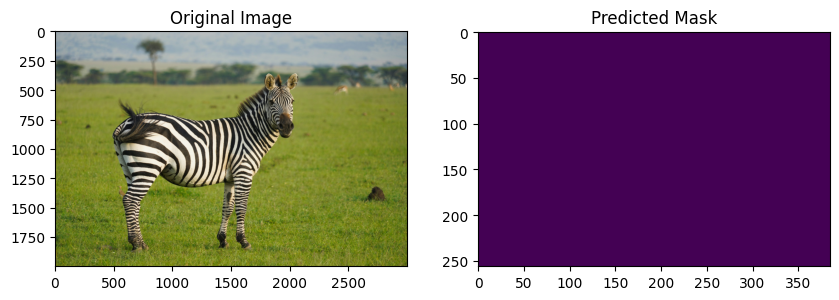

In [36]:
# 4.1 Inference using a pre-trained model (Image Segmentation)

import torch
from torchvision import models, transforms
from PIL import Image
import matplotlib.pyplot as plt

# Load pre-trained DeepLabV3 model
model = models.segmentation.deeplabv3_resnet50(weights="DEFAULT").eval()

# Image paths
path1 = "/content/cat.jpg"
path2 = "/content/dog.jpg"
path3 = "/content/deer.jpg"
path4 = "/content/elephant.jpg"
path5 = "/content/tiger.jpg"
path6 = "/content/zebra.jpg"

# Preprocessing
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225]),
])

# Load and preprocess both images (force RGB)
img1 = Image.open(path1).convert("RGB")
img2 = Image.open(path2).convert("RGB")
img3 = Image.open(path3).convert("RGB")
img4 = Image.open(path4).convert("RGB")
img5 = Image.open(path5).convert("RGB")
img6 = Image.open(path6).convert("RGB")


img_tensor1 = preprocess(img1).unsqueeze(0)
img_tensor2 = preprocess(img2).unsqueeze(0)
img_tensor3 = preprocess(img3).unsqueeze(0)
img_tensor4 = preprocess(img4).unsqueeze(0)
img_tensor5 = preprocess(img5).unsqueeze(0)
img_tensor6 = preprocess(img6).unsqueeze(0)

# Inference
with torch.no_grad():
    mask1 = model(img_tensor1)["out"].argmax(1).squeeze().cpu().numpy()
    mask2 = model(img_tensor2)["out"].argmax(1).squeeze().cpu().numpy()
    mask3 = model(img_tensor3)["out"].argmax(1).squeeze().cpu().numpy()
    mask4 = model(img_tensor4)["out"].argmax(1).squeeze().cpu().numpy()
    mask5 = model(img_tensor5)["out"].argmax(1).squeeze().cpu().numpy()
    mask6 = model(img_tensor6)["out"].argmax(1).squeeze().cpu().numpy()

# Visualization
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img1)
plt.title("Original Image")
plt.subplot(1, 2, 2)
plt.imshow(mask1)
plt.title("Predicted Mask")
plt.show()

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img2)
plt.title("Original Image")
plt.subplot(1, 2, 2)
plt.imshow(mask2)
plt.title("Predicted Mask")
plt.show()

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img3)
plt.title("Original Image")
plt.subplot(1, 2, 2)
plt.imshow(mask3)
plt.title("Predicted Mask")
plt.show()

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img4)
plt.title("Original Image")
plt.subplot(1, 2, 2)
plt.imshow(mask4)
plt.title("Predicted Mask")
plt.show()

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img5)
plt.title("Original Image")
plt.subplot(1, 2, 2)
plt.imshow(mask5)
plt.title("Predicted Mask")
plt.show()

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img6)
plt.title("Original Image")
plt.subplot(1, 2, 2)
plt.imshow(mask5)
plt.title("Predicted Mask")
plt.show()
